# Bài tập: Hoàn thiện 01 file .ipynb mới về tiền xử lý dữ liệu với input đầu
## Mở đầu
Mục tiêu của notebook này là thực hiện tiền xử lý **(preprocessing)** cho bộ dữ liệu dự đoán cho vay **(homeworkdata.csv)**.

Quy trình này bao gồm các bước: tải dữ liệu, khám phá để hiểu rõ cấu trúc, làm sạch các giá trị bị thiếu, và trực quan hóa để tìm ra các mối tương quan quan trọng.

Dữ liệu sau khi được tiền xử lý sẽ "sạch" và sẵn sàng để sử dụng cho việc xây dựng mô hình học máy.

## Mục lục
- Load dữ liệu từ thư mục
- tìm ra dữ liệu thiếu và gán giả trị cho nó
- trực quan hóa dữ liệu

### 1. Khai báo thư viện và Tải dữ liệu

Đầu tiên, chúng ta cần cài đặt và import các thư viện cần thiết cho việc xử lý và trực quan hóa dữ liệu:
* **pandas**: Thư viện dùng để làm việc với dữ liệu dạng bảng (DataFrame), giúp đọc file CSV, xử lý và phân tích dữ liệu.
* **matplotlib.pyplot** và **seaborn**: Hai thư viện để vẽ biểu đồ,trực quan hóa dữ liệu.

In [ ]:
!pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hiển thị biểu đồ trực tiếp trong notebook
%matplotlib inline

Sau khi import thư viện, chúng ta tiến hành tải file `homeworkdata.csv` lên môi trường làm việc và đọc nó vào một DataFrame của pandas có tên là `df`.

In [ ]:
from google.colab import files
upload = files.upload()

Saving homeworkdata.csv to homeworkdata.csv


 Lệnh `df.head()` được dùng để hiển thị 5 dòng đầu tiên của dữ liệu, giúp ta có cái nhìn tổng quan ban đầu về các cột và giá trị bên trong.

In [ ]:
df = pd.read_csv('homeworkdata.csv')
print("Show header")
df.head()

Show header


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2. Khám phá và Phân tích Dữ liệu ban đầu

Trước khi làm sạch, chúng ta cần hiểu rõ hơn về bộ dữ liệu. Bước này rất quan trọng để xác định các vấn đề cần xử lý.

* `df.info()`: Cung cấp thông tin tổng quan về DataFrame, bao gồm:
    * Số lượng dòng và cột.
    * Tên và kiểu dữ liệu (Dtype) của mỗi cột.
    * Số lượng giá trị không bị thiếu (Non-Null Count) trong mỗi cột.

* `df.describe()`: Hiển thị các thống kê mô tả cơ bản cho các cột dữ liệu *số* (numerical), ví dụ:
    * `count`: Số lượng giá trị.
    * `mean`: Giá trị trung bình.
    * `std`: Độ lệch chuẩn.
    * `min`, `max`: Giá trị nhỏ nhất, lớn nhất.
    * `25%`, `50%`, `75%`: Các giá trị phân vị. Giá trị 50% chính là trung vị (median).

* `df.isnull().sum()`: Đây là lệnh trực tiếp và rõ ràng nhất để đếm số lượng giá trị bị thiếu (null hoặc NaN) trong từng cột. Kết quả cho thấy chính xác số ô trống cần được xử lý ở các cột.

In [ ]:
print("--- normal data in data frame ---")
print(df.info())

print("--- statistical data ---")
print(df.describe())

print("--- data missing ---")
print(df.isnull().sum())

--- normal data in data frame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
--- statistical data ---
       ApplicantIncome  CoapplicantIncome  LoanA

### 3. Xử lý Dữ liệu bị thiếu

Các mô hình học máy không thể hoạt động với dữ liệu bị thiếu, vì vậy bước này là bắt buộc. Chiến lược xử lý như sau:

* **Đối với các cột dữ liệu phân loại (Categorical - kiểu `object`):**
    * **Các cột:** `Gender`, `Married`, `Dependents`, `Self_Employed`, `Credit_History`.
    * **Phương pháp:** Điền giá trị bị thiếu bằng **mode** (tần suất xuất hiện cao nhất) của cột đó.
    * **Lý do phù hợp:** Vì đây là các giá trị dạng chuỗi (text) không thể tính toán trung bình hay trung vị, việc chọn giá trị phổ biến nhất để thay thế là một cách tiếp cận hợp lý, ít làm thay đổi sự phân bổ tự nhiên của dữ liệu.

* **Đối với các cột dữ liệu số (Numerical - kiểu `float64`):**
    * **Các cột:** `LoanAmount`, `Loan_Amount_Term`.
    * **Phương pháp:** Điền giá trị bị thiếu bằng **median** (trung vị) của cột đó.
    * **Lý do phù hợp:** Chúng ta chọn *trung vị* thay vì *trung bình* (mean) vì trung vị ít bị ảnh hưởng bởi các giá trị ngoại lệ (outliers - các giá trị quá lớn hoặc quá nhỏ). Dựa vào `df.describe()`, ta có thể thấy sự chênh lệch giữa giá trị trung bình và trung vị, cho thấy dữ liệu có thể bị lệch. Do đó, dùng trung vị sẽ an toàn và đại diện tốt hơn cho phần lớn dữ liệu.

Sau khi điền các giá trị, ta chạy lại lệnh `df.isnull().sum()` để kiểm tra. Kết quả cho thấy tất cả các cột đều có 0 giá trị bị thiếu, xác nhận dữ liệu đã được làm sạch thành công.

In [ ]:
# fill missing data type object with Popular base
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df[col] = df[col].fillna(df[col].mode()[0])
# fill missing data type Numerical with Median values
for col in ['LoanAmount', 'Loan_Amount_Term']:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
# check missing data
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


### 4. Trực quan hóa Dữ liệu

Sau khi làm sạch, chúng ta vẽ một vài biểu đồ để tìm hiểu sâu hơn về mối quan hệ giữa các đặc trưng (features) và biến mục tiêu (`Loan_Status`).

* **Biểu đồ 1: Phân phối Trạng thái Khoản vay (`Loan_Status`)**
    * Biểu đồ này cho thấy số lượng các khoản vay được chấp thuận ('Y') và không được chấp thuận ('N').
    * **Nhận xét:** Số lượng khoản vay được chấp thuận nhiều hơn đáng kể so với không được chấp thuận. Điều này cho thấy dữ liệu có sự mất cân bằng, một thông tin quan trọng cho bước xây dựng mô hình sau này.

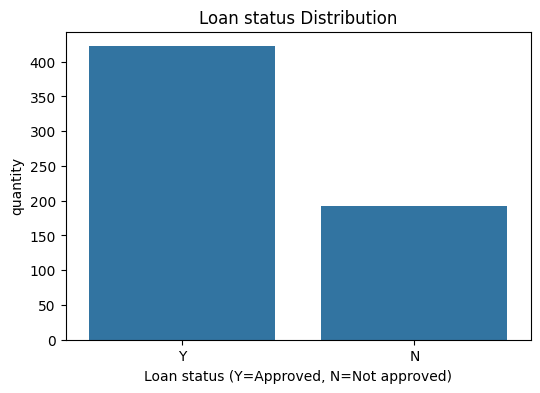

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan status Distribution')
plt.xlabel('Loan status (Y=Approved, N=Not approved)')
plt.ylabel('quantity')
plt.show()

* **Biểu đồ 2: Lịch sử Tín dụng (`Credit_History`) và Trạng thái Khoản vay**
    * Biểu đồ này so sánh tỷ lệ được duyệt vay giữa những người có lịch sử tín dụng tốt (giá trị 1.0) và không có (giá trị 0.0).
    * **Nhận xét:** Có một mối tương quan rất mạnh mẽ. Những người có lịch sử tín dụng tốt có tỷ lệ được duyệt vay cao hơn rất nhiều. Đây là một đặc trưng cực kỳ quan trọng và có sức ảnh hưởng lớn đến kết quả dự đoán.

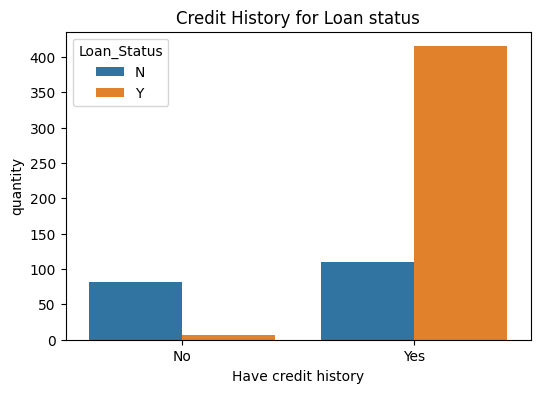

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Credit History for Loan status')
plt.xlabel('Have credit history')
plt.ylabel('quantity')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

* **Biểu đồ 3: Khu vực Bất động sản (`Property_Area`) và Trạng thái Khoản vay**
    * Biểu đồ thể hiện số lượng khoản vay được duyệt/từ chối theo từng khu vực (Nông thôn, Bán đô thị, Đô thị).
    * **Nhận xét:** Có thể thấy tỷ lệ duyệt vay ở khu vực Bán đô thị (Semiurban) cao hơn so với hai khu vực còn lại. Đây cũng là một thông tin hữu ích.

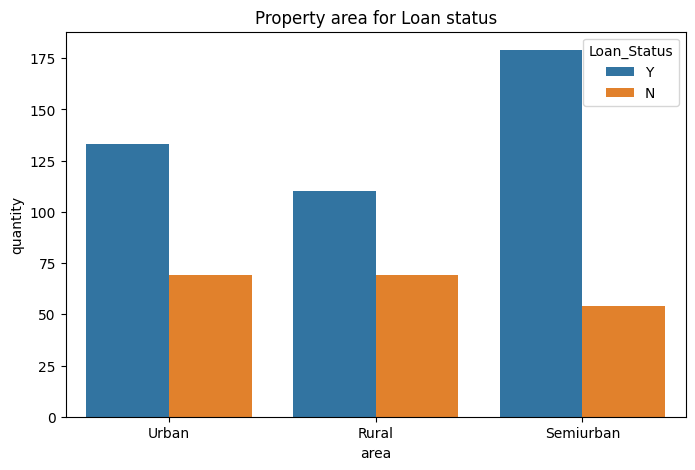

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Property area for Loan status')
plt.xlabel('area')
plt.ylabel('quantity')
plt.show()

# Tổng quát Quy trình Tiền xử lý Dữ liệu
Bài tập này trình bày một quy trình tiền xử lý dữ liệu hoàn chỉnh cho bộ dữ liệu dự đoán khả năng cho vay, với mục tiêu cuối cùng là làm sạch và chuẩn bị dữ liệu để sẵn sàng cho việc xây dựng mô hình học máy.

Quy trình thực hiện gồm:
- Khám phá Dữ liệu (Data Exploration):
- Làm sạch Dữ liệu (Data Cleaning):
- Trực quan hóa (Visualization):

Kết quả cuối cùng
Đầu ra là một bộ dữ liệu đã được làm sạch hoàn toàn, không còn giá trị thiếu và đã được khám phá sơ bộ. Dữ liệu này hoàn toàn phù hợp để chuyển sang giai đoạn tiếp theo là xây dựng mô hình dự đoán (machine learning model).